<a href="https://colab.research.google.com/github/noran97/NTI-AI-projects/blob/main/LogRegVSRandomForest_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd

(1797, 64)


<Figure size 640x480 with 0 Axes>

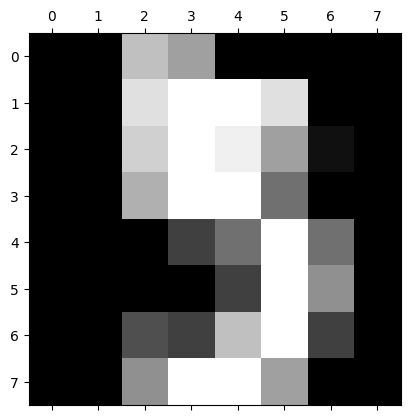

In [ ]:
digits = datasets.load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[5])
plt.show()

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logreg = LogisticRegression(C=1.0, max_iter=1000, tol=1e-4)  # Adjust hyperparameters as needed
logreg.fit(X_train, y_train)
logreg.score(X_train,y_train)

1.0

In [ ]:
logreg.score(X_test,y_test)

0.9655172413793104

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
#printing classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        83
           1       0.94      0.88      0.91        93
           2       0.97      1.00      0.98        88
           3       1.00      0.98      0.99        88
           4       0.99      0.99      0.99        87
           5       0.96      0.96      0.96        96
           6       0.98      1.00      0.99        85
           7       1.00      0.99      0.99        92
           8       0.99      0.90      0.94        91
           9       0.86      0.98      0.92        96

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Confusion matrix:
[[82  0  1  0  0  0  0  0  0  0]
 [ 0 82  1  0  0  0  0  0  0 10]
 [ 0  0 88  0  0  0  0  0  0  0]
 [ 0  0  0 86  0  2  0  0  0  0]
 [ 0  0  0  0 86  0  0  0  0  1]
 [ 0  0  0  0  0 92  1  0  0  3]
 [ 0  0  0  0  0  0 85  0  0  0]
 [ 0  0  0  0  1  0  0 91  0  0]
 [ 0  5  1  0  0  1  1  0 82  1]
 [ 0  0  0  0  0  1  0  0  1 94]]


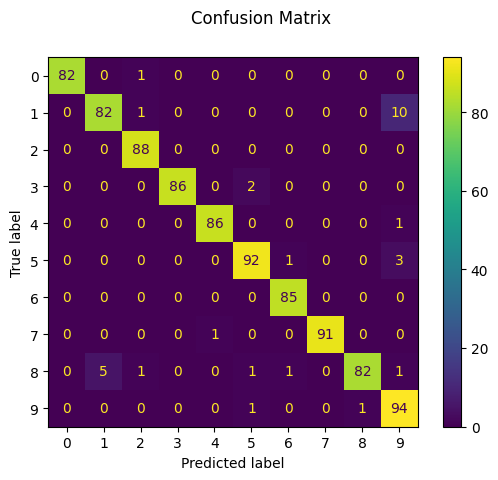

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8342602892102335


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        83
           1       0.72      0.83      0.77        93
           2       0.84      0.75      0.79        88
           3       0.74      0.83      0.78        88
           4       0.81      0.91      0.86        87
           5       0.89      0.91      0.90        96
           6       0.91      0.93      0.92        85
           7       0.93      0.84      0.88        92
           8       0.75      0.74      0.74        91
           9       0.84      0.69      0.75        96

    accuracy                           0.83       899
   macro avg       0.84      0.84      0.84       899
weighted avg       0.84      0.83      0.83       899



In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_train_normalized  = MinMaxScaler().fit_transform(X_train)
x_test_normalized = MinMaxScaler().fit_transform(X_test)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)
clf = clf.fit(x_train_normalized,y_train)
y_pred = clf.predict(x_test_normalized)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8387096774193549


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9666295884315906


In [ ]:
num_estimators = rf.n_estimators

print("Number of estimators used:", num_estimators)

Number of estimators used: 100


In [ ]:
rf2 = RandomForestClassifier(n_estimators=40)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9610678531701891


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9510567296996663
